Cele B.X 22301773 (Wrote DIRISA)
Gumbi M.P 22330742 (Wrote DIRISA)
Hlongwane N 22333548 (Wrote DIRISA)
Makhathini P.S 22325114 (Wrote DIRISA)
Mnyawe S 22425322 (Wrote DIRISA)
Rhongwana B 22422182 (Wrote DIRISA)

We selected this dataset because it contains five interrelated tables, providing a relational structure suitable for comprehensive analysis. The dataset captures key aspects such as healthcare usage, costs, population demographics, and health conditions within South Africa. Its richness and relational nature make it well-suited for developing predictive models, particularly in forecasting the demand for healthcare services in South Africa.

The Hospital Management Dataset used in this project can be accessed on Kaggle via the following link: https://www.kaggle.com/datasets/kanakbaghel/hospital-management-dataset

Importing neccesary libraries to manipulate data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib as jb

from sklearn.model_selection import train_test_split
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, f1_score

Loading the dataset folder from the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Showing the first 5 rows for each table

In [ ]:
folder_path = '/content/drive/MyDrive/dataset3'

files = os.listdir(folder_path)
print("Files in folder:", files)

for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        print(f"\nLoaded: {file}")
        print(df.head())

Files in folder: ['appointments.csv', 'billing.csv', 'doctors.csv', 'patients.csv', 'treatments.csv']

Loaded: appointments.csv
  appointment_id patient_id doctor_id appointment_date appointment_time  \
0           A001       P034      D009       2023-08-09         15:15:00   
1           A002       P032      D004       2023-06-09         14:30:00   
2           A003       P048      D004       2023-06-28          8:00:00   
3           A004       P025      D006       2023-09-01          9:15:00   
4           A005       P040      D003       2023-07-06         12:45:00   

  reason_for_visit     status  
0          Therapy  Scheduled  
1          Therapy    No-show  
2     Consultation  Cancelled  
3     Consultation  Cancelled  
4        Emergency    No-show  

Loaded: billing.csv
  bill_id patient_id treatment_id   bill_date   amount payment_method  \
0    B001       P034         T001  2023-08-09  3941.97      Insurance   
1    B002       P032         T002  2023-06-09  4158.44      In

Showing the last 5 rows

In [ ]:

for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        print(f"\nLoaded: {file}")
        print(df.tail())


Loaded: appointments.csv
    appointment_id patient_id doctor_id appointment_date appointment_time  \
195           A196       P045      D006       2023-10-26          9:45:00   
196           A197       P001      D005       2023-04-01         13:30:00   
197           A198       P022      D006       2023-05-15          8:30:00   
198           A199       P017      D001       2023-05-01         12:45:00   
199           A200       P007      D005       2023-12-30         10:15:00   

    reason_for_visit     status  
195          Checkup  Cancelled  
196        Emergency    No-show  
197          Therapy    No-show  
198        Follow-up  Completed  
199     Consultation  Cancelled  

Loaded: billing.csv
    bill_id patient_id treatment_id   bill_date   amount payment_method  \
195    B196       P045         T196  2023-10-26  2477.80           Cash   
196    B197       P001         T197  2023-04-01   975.49           Cash   
197    B198       P022         T198  2023-05-15  3383.72     

Displaying infomation about the tables

In [ ]:

for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        print(f"\nLoaded: {file}")
        print(df.info())


Loaded: appointments.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   appointment_id    200 non-null    object
 1   patient_id        200 non-null    object
 2   doctor_id         200 non-null    object
 3   appointment_date  200 non-null    object
 4   appointment_time  200 non-null    object
 5   reason_for_visit  200 non-null    object
 6   status            200 non-null    object
dtypes: object(7)
memory usage: 11.1+ KB
None

Loaded: billing.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bill_id         200 non-null    object 
 1   patient_id      200 non-null    object 
 2   treatment_id    200 non-null    object 
 3   bill_date       200 non-null    object 
 4   amount    

Descibing the information on the tables

In [ ]:

for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        print(f"\nLoaded: {file}")
        print(df.describe())


Loaded: appointments.csv
       appointment_id patient_id doctor_id appointment_date appointment_time  \
count             200        200       200              200              200   
unique            200         48        10              158               40   
top              A001       P012      D005       2023-08-16         11:00:00   
freq                1         10        29                5                9   

       reason_for_visit   status  
count               200      200  
unique                5        4  
top             Checkup  No-show  
freq                 45       52  

Loaded: billing.csv
            amount
count   200.000000
mean   2756.249250
std    1298.125308
min     534.030000
25%    1563.412500
50%    2828.165000
75%    3836.627500
max    4973.630000

Loaded: doctors.csv
       phone_number  years_experience
count  1.000000e+01           10.0000
mean   7.919716e+09           21.5000
std    1.142890e+09            6.7536
min    6.176384e+09            5.

Display the shape of each dataframe

In [ ]:

for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        print(f"\nLoaded: {file}")
        print(df.shape)


Loaded: appointments.csv
(200, 7)

Loaded: billing.csv
(200, 7)

Loaded: doctors.csv
(10, 8)

Loaded: patients.csv
(50, 11)

Loaded: treatments.csv
(200, 6)


Display the size for each table

In [ ]:

for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        print(f"\nLoaded: {file}")
        print(df.size)


Loaded: appointments.csv
1400

Loaded: billing.csv
1400

Loaded: doctors.csv
80

Loaded: patients.csv
550

Loaded: treatments.csv
1200


Displaying each type of each column in the tables

In [ ]:

for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        print(f"\nLoaded: {file}")
        print(df.dtypes)


Loaded: appointments.csv
appointment_id      object
patient_id          object
doctor_id           object
appointment_date    object
appointment_time    object
reason_for_visit    object
status              object
dtype: object

Loaded: billing.csv
bill_id            object
patient_id         object
treatment_id       object
bill_date          object
amount            float64
payment_method     object
payment_status     object
dtype: object

Loaded: doctors.csv
doctor_id           object
first_name          object
last_name           object
specialization      object
phone_number         int64
years_experience     int64
hospital_branch     object
email               object
dtype: object

Loaded: patients.csv
patient_id            object
first_name            object
last_name             object
gender                object
date_of_birth         object
contact_number         int64
address               object
registration_date     object
insurance_provider    object
insurance_number    

Displaying the range index for table

In [ ]:

for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        print(f"\nLoaded: {file}")
        print(df.index)


Loaded: appointments.csv
RangeIndex(start=0, stop=200, step=1)

Loaded: billing.csv
RangeIndex(start=0, stop=200, step=1)

Loaded: doctors.csv
RangeIndex(start=0, stop=10, step=1)

Loaded: patients.csv
RangeIndex(start=0, stop=50, step=1)

Loaded: treatments.csv
RangeIndex(start=0, stop=200, step=1)


Renaming the first columns in each table

In [ ]:
Appointment = pd.read_csv('/content/drive/MyDrive/dataset3/appointments.csv')
Billing = pd.read_csv('/content/drive/MyDrive/dataset3/billing.csv')
Doctors = pd.read_csv('/content/drive/MyDrive/dataset3/doctors.csv')
Patients = pd.read_csv('/content/drive/MyDrive/dataset3/patients.csv')
Treatments = pd.read_csv('/content/drive/MyDrive/dataset3/treatments.csv')

Appointment.rename(columns={'appointment_id': 'a_id'}, inplace=True)
Billing.rename(columns={'bill_id': 'b_id'}, inplace=True)
Doctors.rename(columns={'doctor_id': 'd_id'}, inplace=True)
Patients.rename(columns={'patient_id': 'p_id'}, inplace=True)
Treatments.rename(columns={'treatment_id': 't_id'}, inplace=True)

display(Appointment.head())
display(Billing.head())
display(Doctors.head())
display(Patients.head())
display(Treatments.head())

,a_id,patient_id,doctor_id,appointment_date,appointment_time,reason_for_visit,status
0,A001,P034,D009,2023-08-09,15:15:00,Therapy,Scheduled
1,A002,P032,D004,2023-06-09,14:30:00,Therapy,No-show
2,A003,P048,D004,2023-06-28,8:00:00,Consultation,Cancelled
3,A004,P025,D006,2023-09-01,9:15:00,Consultation,Cancelled
4,A005,P040,D003,2023-07-06,12:45:00,Emergency,No-show


,b_id,patient_id,treatment_id,bill_date,amount,payment_method,payment_status
0,B001,P034,T001,2023-08-09,3941.97,Insurance,Pending
1,B002,P032,T002,2023-06-09,4158.44,Insurance,Paid
2,B003,P048,T003,2023-06-28,3731.55,Insurance,Paid
3,B004,P025,T004,2023-09-01,4799.86,Insurance,Failed
4,B005,P040,T005,2023-07-06,582.05,Credit Card,Pending


,d_id,first_name,last_name,specialization,phone_number,years_experience,hospital_branch,email
0,D001,David,Taylor,Dermatology,8322010158,17,Westside Clinic,dr.david.taylor@hospital.com
1,D002,Jane,Davis,Pediatrics,9004382050,24,Eastside Clinic,dr.jane.davis@hospital.com
2,D003,Jane,Smith,Pediatrics,8737740598,19,Eastside Clinic,dr.jane.smith@hospital.com
3,D004,David,Jones,Pediatrics,6594221991,28,Central Hospital,dr.david.jones@hospital.com
4,D005,Sarah,Taylor,Dermatology,9118538547,26,Central Hospital,dr.sarah.taylor@hospital.com


,p_id,first_name,last_name,gender,date_of_birth,contact_number,address,registration_date,insurance_provider,insurance_number,email
0,P001,David,Williams,F,1955-06-04,6939585183,789 Pine Rd,2022-06-23,WellnessCorp,INS840674,david.williams@mail.com
1,P002,Emily,Smith,F,1984-10-12,8228188767,321 Maple Dr,2022-01-15,PulseSecure,INS354079,emily.smith@mail.com
2,P003,Laura,Jones,M,1977-08-21,8397029847,321 Maple Dr,2022-02-07,PulseSecure,INS650929,laura.jones@mail.com
3,P004,Michael,Johnson,F,1981-02-20,9019443432,123 Elm St,2021-03-02,HealthIndia,INS789944,michael.johnson@mail.com
4,P005,David,Wilson,M,1960-06-23,7734463155,123 Elm St,2021-09-29,MedCare Plus,INS788105,david.wilson@mail.com


,t_id,appointment_id,treatment_type,description,cost,treatment_date
0,T001,A001,Chemotherapy,Basic screening,3941.97,2023-08-09
1,T002,A002,MRI,Advanced protocol,4158.44,2023-06-09
2,T003,A003,MRI,Standard procedure,3731.55,2023-06-28
3,T004,A004,MRI,Basic screening,4799.86,2023-09-01
4,T005,A005,ECG,Standard procedure,582.05,2023-07-06


Data Slicing

Slice each DataFrame

In [ ]:
from IPython.display import display, HTML


Appointment = Appointment.head(5)
Billing = Billing.head(5)
Doctors = Doctors.head(5)
Patients = Patients.head(5)
Treatments = Treatments.head(5)

Treatments.rename(columns={'treatment_id': 't_id'}, inplace=True)


tables = [("Appointment", Appointment), ("Billing", Billing), ("Doctors", Doctors), ("Patients", Patients), ("Treatments", Treatments)]

for name, df in tables:
    display(HTML(f'<h3 style="color:darkgreen;">{name}</h3>'))
    display(df.head())

,a_id,patient_id,doctor_id,appointment_date,appointment_time,reason_for_visit,status
0,A001,P034,D009,2023-08-09,15:15:00,Therapy,Scheduled
1,A002,P032,D004,2023-06-09,14:30:00,Therapy,No-show
2,A003,P048,D004,2023-06-28,8:00:00,Consultation,Cancelled
3,A004,P025,D006,2023-09-01,9:15:00,Consultation,Cancelled
4,A005,P040,D003,2023-07-06,12:45:00,Emergency,No-show


,b_id,patient_id,treatment_id,bill_date,amount,payment_method,payment_status
0,B001,P034,T001,2023-08-09,3941.97,Insurance,Pending
1,B002,P032,T002,2023-06-09,4158.44,Insurance,Paid
2,B003,P048,T003,2023-06-28,3731.55,Insurance,Paid
3,B004,P025,T004,2023-09-01,4799.86,Insurance,Failed
4,B005,P040,T005,2023-07-06,582.05,Credit Card,Pending


,d_id,first_name,last_name,specialization,phone_number,years_experience,hospital_branch,email
0,D001,David,Taylor,Dermatology,8322010158,17,Westside Clinic,dr.david.taylor@hospital.com
1,D002,Jane,Davis,Pediatrics,9004382050,24,Eastside Clinic,dr.jane.davis@hospital.com
2,D003,Jane,Smith,Pediatrics,8737740598,19,Eastside Clinic,dr.jane.smith@hospital.com
3,D004,David,Jones,Pediatrics,6594221991,28,Central Hospital,dr.david.jones@hospital.com
4,D005,Sarah,Taylor,Dermatology,9118538547,26,Central Hospital,dr.sarah.taylor@hospital.com


,p_id,first_name,last_name,gender,date_of_birth,contact_number,address,registration_date,insurance_provider,insurance_number,email
0,P001,David,Williams,F,1955-06-04,6939585183,789 Pine Rd,2022-06-23,WellnessCorp,INS840674,david.williams@mail.com
1,P002,Emily,Smith,F,1984-10-12,8228188767,321 Maple Dr,2022-01-15,PulseSecure,INS354079,emily.smith@mail.com
2,P003,Laura,Jones,M,1977-08-21,8397029847,321 Maple Dr,2022-02-07,PulseSecure,INS650929,laura.jones@mail.com
3,P004,Michael,Johnson,F,1981-02-20,9019443432,123 Elm St,2021-03-02,HealthIndia,INS789944,michael.johnson@mail.com
4,P005,David,Wilson,M,1960-06-23,7734463155,123 Elm St,2021-09-29,MedCare Plus,INS788105,david.wilson@mail.com


,t_id,appointment_id,treatment_type,description,cost,treatment_date
0,T001,A001,Chemotherapy,Basic screening,3941.97,2023-08-09
1,T002,A002,MRI,Advanced protocol,4158.44,2023-06-09
2,T003,A003,MRI,Standard procedure,3731.55,2023-06-28
3,T004,A004,MRI,Basic screening,4799.86,2023-09-01
4,T005,A005,ECG,Standard procedure,582.05,2023-07-06


Selecting certain columns

In [ ]:
Appointment = pd.read_csv('/content/drive/MyDrive/dataset3/appointments.csv')

Appointment['reason_for_visit']


,reason_for_visit
0,Therapy
1,Therapy
2,Consultation
3,Consultation
4,Emergency
...,...
195,Checkup
196,Emergency
197,Therapy
198,Follow-up


In [ ]:
Billing = pd.read_csv('/content/drive/MyDrive/dataset3/billing.csv')

Billing['payment_status']


,payment_status
0,Pending
1,Paid
2,Paid
3,Failed
4,Pending
...,...
195,Pending
196,Pending
197,Failed
198,Paid


In [ ]:
Doctors = pd.read_csv('/content/drive/MyDrive/dataset3/doctors.csv')

Doctors['specialization']



,specialization
0,Dermatology
1,Pediatrics
2,Pediatrics
3,Pediatrics
4,Dermatology
5,Pediatrics
6,Oncology
7,Dermatology
8,Pediatrics
9,Oncology


In [ ]:
Patients = pd.read_csv('/content/drive/MyDrive/dataset3/patients.csv')

Patients['gender']


,gender
0,F
1,F
2,M
3,F
4,M
5,M
6,F
7,F
8,M
9,M


In [ ]:
Treatments = pd.read_csv('/content/drive/MyDrive/dataset3/treatments.csv')

Treatments['cost']

,cost
0,3941.97
1,4158.44
2,3731.55
3,4799.86
4,582.05
...,...
195,2477.80
196,975.49
197,3383.72
198,1472.17


Selecting rows and columns using iloc

In [ ]:
Appointment.iloc[0:5,0:3]


,appointment_id,patient_id,doctor_id
0,A001,P034,D009
1,A002,P032,D004
2,A003,P048,D004
3,A004,P025,D006
4,A005,P040,D003


In [ ]:
Billing.iloc[1:6,0:4]

,bill_id,patient_id,treatment_id,bill_date
1,B002,P032,T002,2023-06-09
2,B003,P048,T003,2023-06-28
3,B004,P025,T004,2023-09-01
4,B005,P040,T005,2023-07-06
5,B006,P045,T006,2023-06-19


In [ ]:
Doctors.iloc[2:7,0:5]

,doctor_id,first_name,last_name,specialization,phone_number
2,D003,Jane,Smith,Pediatrics,8737740598
3,D004,David,Jones,Pediatrics,6594221991
4,D005,Sarah,Taylor,Dermatology,9118538547
5,D006,Alex,Davis,Pediatrics,6570137231
6,D007,Robert,Davis,Oncology,8217493115


In [ ]:
Patients.iloc[0:9,0:6]

,patient_id,first_name,last_name,gender,date_of_birth,contact_number
0,P001,David,Williams,F,1955-06-04,6939585183
1,P002,Emily,Smith,F,1984-10-12,8228188767
2,P003,Laura,Jones,M,1977-08-21,8397029847
3,P004,Michael,Johnson,F,1981-02-20,9019443432
4,P005,David,Wilson,M,1960-06-23,7734463155
5,P006,Linda,Jones,M,1963-06-16,7561777264
6,P007,Alex,Johnson,F,1989-06-08,6278710077
7,P008,David,Davis,F,1976-07-05,7090558393
8,P009,Laura,Davis,M,1971-12-11,7060324619


In [ ]:
Treatments.iloc[1:20,0:6]

,treatment_id,appointment_id,treatment_type,description,cost,treatment_date
1,T002,A002,MRI,Advanced protocol,4158.44,2023-06-09
2,T003,A003,MRI,Standard procedure,3731.55,2023-06-28
3,T004,A004,MRI,Basic screening,4799.86,2023-09-01
4,T005,A005,ECG,Standard procedure,582.05,2023-07-06
5,T006,A006,Chemotherapy,Standard procedure,1381.00,2023-06-19
6,T007,A007,Chemotherapy,Advanced protocol,534.03,2023-04-09
7,T008,A008,Physiotherapy,Basic screening,3413.64,2023-05-24
8,T009,A009,Physiotherapy,Standard procedure,4541.14,2023-03-05
9,T010,A010,Physiotherapy,Standard procedure,1595.67,2023-01-13
10,T011,A011,MRI,Basic screening,4671.66,2023-11-12


Adding a column on the doctors table.

In [ ]:
Doctors = pd.read_csv('/content/drive/MyDrive/dataset3/doctors.csv')
Doctors['Qualified_At'] = ['UCT', 'UKZN', 'WITS', 'UJ', 'UKZN', 'UCT', 'WSU', 'UWC', 'UP', 'CPUT']

Doctors.head()

,doctor_id,first_name,last_name,specialization,phone_number,years_experience,hospital_branch,email,Qualified_At
0,D001,David,Taylor,Dermatology,8322010158,17,Westside Clinic,dr.david.taylor@hospital.com,UCT
1,D002,Jane,Davis,Pediatrics,9004382050,24,Eastside Clinic,dr.jane.davis@hospital.com,UKZN
2,D003,Jane,Smith,Pediatrics,8737740598,19,Eastside Clinic,dr.jane.smith@hospital.com,WITS
3,D004,David,Jones,Pediatrics,6594221991,28,Central Hospital,dr.david.jones@hospital.com,UJ
4,D005,Sarah,Taylor,Dermatology,9118538547,26,Central Hospital,dr.sarah.taylor@hospital.com,UKZN


Selecting a subset of a DataFrame based on a codition

In [ ]:
print(Treatments[Treatments['cost'] > 2000])

    treatment_id appointment_id treatment_type         description     cost  \
0           T001           A001   Chemotherapy     Basic screening  3941.97   
1           T002           A002            MRI   Advanced protocol  4158.44   
2           T003           A003            MRI  Standard procedure  3731.55   
3           T004           A004            MRI     Basic screening  4799.86   
7           T008           A008  Physiotherapy     Basic screening  3413.64   
..           ...            ...            ...                 ...      ...   
192         T193           A193  Physiotherapy   Advanced protocol  2446.24   
194         T195           A195            ECG  Standard procedure  2777.64   
195         T196           A196   Chemotherapy   Advanced protocol  2477.80   
197         T198           A198            ECG     Basic screening  3383.72   
199         T200           A200          X-Ray     Basic screening  3288.15   

    treatment_date  
0       2023-08-09  
1       2

Data Cleaning

Droping the duplicates

In [ ]:
duplicates = Treatments.duplicated()
print(duplicates.any())

False


In [ ]:
duplicates = Doctors.duplicated()
print(duplicates.any())

False


In [ ]:
duplicates = Appointment.duplicated()
print(duplicates.any())

False


In [ ]:
duplicates = Billing.duplicated()
print(duplicates.any())

False


In [ ]:
duplicates = Patients.duplicated()
print(duplicates.any())

False


All our tables does not have any duplicates that is why we did not drop any of them

Droping the useless columns

In [ ]:
Appointment = Appointment.drop(['appointment_time'], axis=1)
Appointment.head()

,appointment_id,patient_id,doctor_id,appointment_date,reason_for_visit,status
0,A001,P034,D009,2023-08-09,Therapy,Scheduled
1,A002,P032,D004,2023-06-09,Therapy,No-show
2,A003,P048,D004,2023-06-28,Consultation,Cancelled
3,A004,P025,D006,2023-09-01,Consultation,Cancelled
4,A005,P040,D003,2023-07-06,Emergency,No-show


Drop Rows with missing Values

In [ ]:
Billing.isnull().sum()

,0
bill_id,0
patient_id,0
treatment_id,0
bill_date,0
amount,0
payment_method,0
payment_status,0


There is no row with missing value hence we did not drop them.

Strip Function

Our dataset does not have white spaces, hence if we had white spaces, this is the code we were going to use

In [ ]:
Treatments['t_id'] =Treatments['t_id'].str.strip()
Treatments.head()

,t_id,appointment_id,treatment_type,description,cost,treatment_date
0,T001,A001,Chemotherapy,Basic screening,3941.97,2023-08-09
1,T002,A002,MRI,Advanced protocol,4158.44,2023-06-09
2,T003,A003,MRI,Standard procedure,3731.55,2023-06-28
3,T004,A004,MRI,Basic screening,4799.86,2023-09-01
4,T005,A005,ECG,Standard procedure,582.05,2023-07-06


Fill the Empty Vaues( Our dataset does not have empty value, but this is the code code we were going to use )

In [ ]:
Treatments = Treatments.fillna()

Identifying the missing values(Our dataset does not have missing values, but this is the code we were going to use)

In [ ]:
Treatments.isnull().sum()

if have null values

In [ ]:
Doctors['d_id'].isnull().mean()
print(column+ ' : '+ str(round(Doctors[''].isnull().mean()2)*100))+'%')

Dealing with missing data(Columns)

In [ ]:
Appointments.drop(['appointment_time'], axis=1, inplace=True)

Dealing with missing data(Rows)

In [ ]:
Billing[Billing['payment_status'].isnull()].index
Billing.drop[variable,axis=0, is null inplace=True]

comparing 2 columns

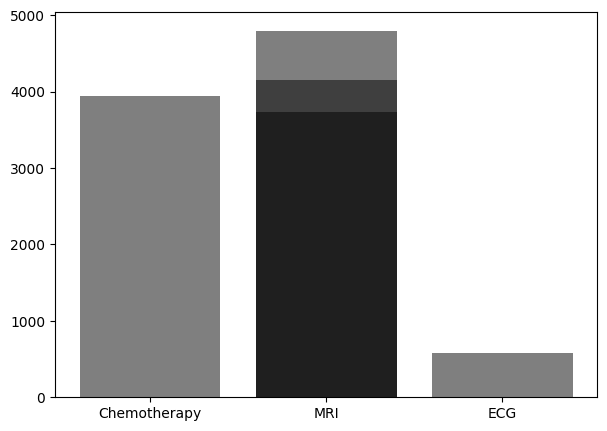

In [ ]:
Sitesnames = Treatments['treatment_type']
Tourdur = Treatments['cost']
plt.figure(figsize =(7,5))
plt.bar(Sitesnames,Tourdur,color='black',alpha = 0.5)
plt.show()

Histogram

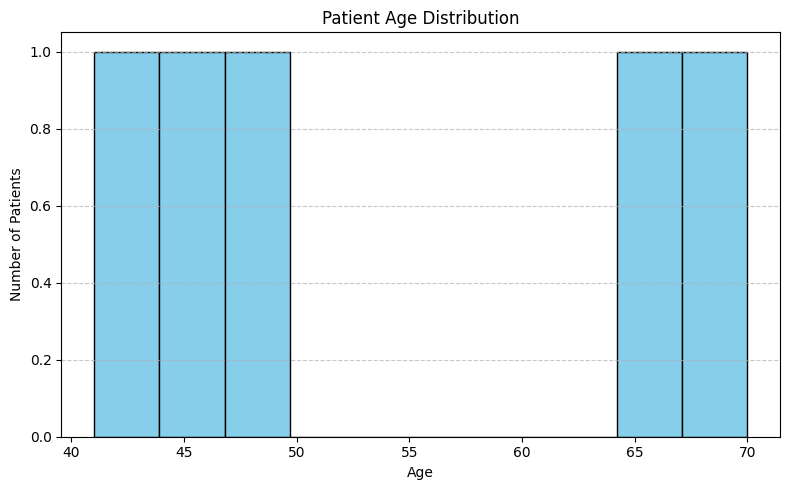

In [ ]:
# Convert date_of_birth to datetime
Patients['date_of_birth'] = pd.to_datetime(Patients['date_of_birth'])

# Calculate age
from datetime import datetime, date
current_year = date.today().year
Patients['age'] = current_year - Patients['date_of_birth'].dt.year

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(Patients['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Patient Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Line Graph

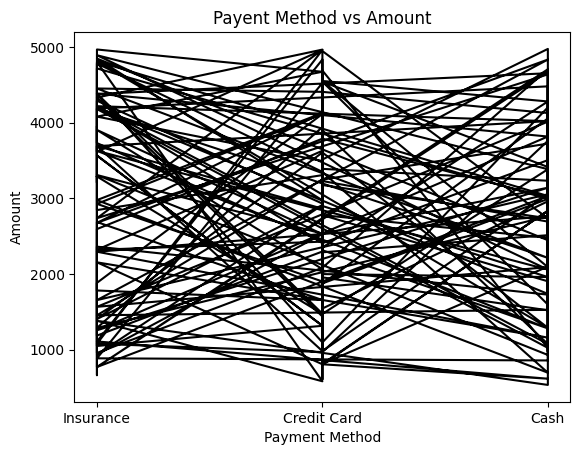

In [ ]:
xpoints = Billing['payment_method']
ypoints = Billing['amount']
plt.plot(xpoints,ypoints, linestyle = '-', color = 'black')
plt.title('Payent Method vs Amount')
plt.xlabel('Payment Method')
plt.ylabel('Amount')
plt.show()

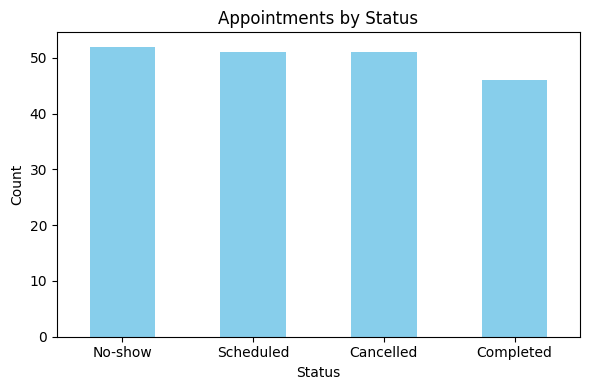

In [ ]:
appointments_status_counts = Appointment['status'].value_counts()

plt.figure(figsize=(6, 4))
appointments_status_counts.plot(kind='bar', color='skyblue')
plt.title('Appointments by Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Pie Chart

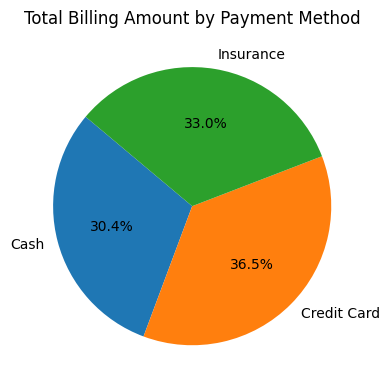

In [ ]:
billing_by_payment_method = Billing.groupby('payment_method')['amount'].sum()

plt.figure(figsize=(6, 4))
billing_by_payment_method.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Total Billing Amount by Payment Method')
plt.ylabel('')
plt.tight_layout()
plt.show()


Line Chart

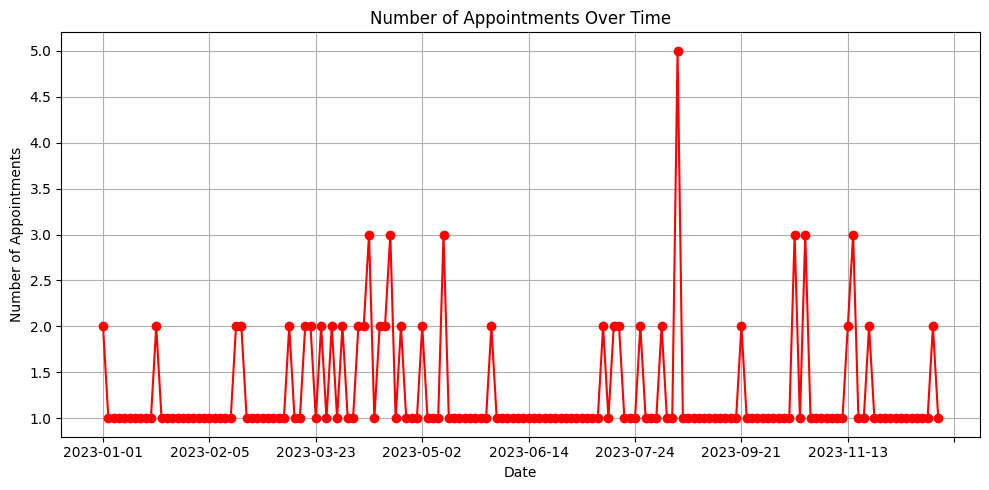

In [ ]:
Appointment['Appointment_date'] = pd.to_datetime(Appointment['appointment_date'])
appointments_over_time = Appointment.groupby('appointment_date').size()

plt.figure(figsize=(10, 5))
appointments_over_time.plot(kind='line', marker='o', color='red')
plt.title('Number of Appointments Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Appointments')
plt.grid(True)
plt.tight_layout()
plt.show()

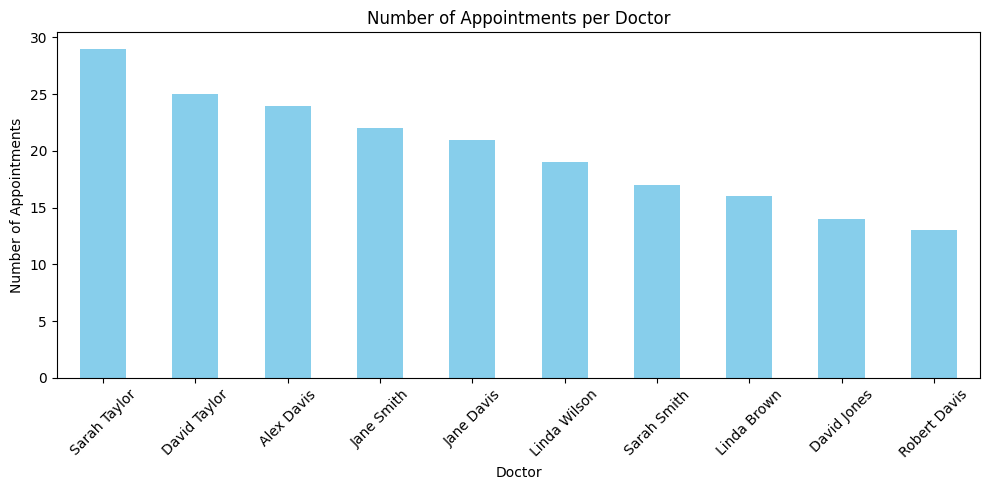

In [ ]:
# Merge appointments with doctors
appointments_with_doctors = Appointment.merge(Doctors, on='doctor_id')

# Create full doctor name
appointments_with_doctors['doctor_name'] = (
    appointments_with_doctors['first_name'] + ' ' + appointments_with_doctors['last_name']
)

# Count appointments per doctor
doctor_counts = appointments_with_doctors['doctor_name'].value_counts()

# Plot bar graph
plt.figure(figsize=(10, 5))
doctor_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Appointments per Doctor')
plt.xlabel('Doctor')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

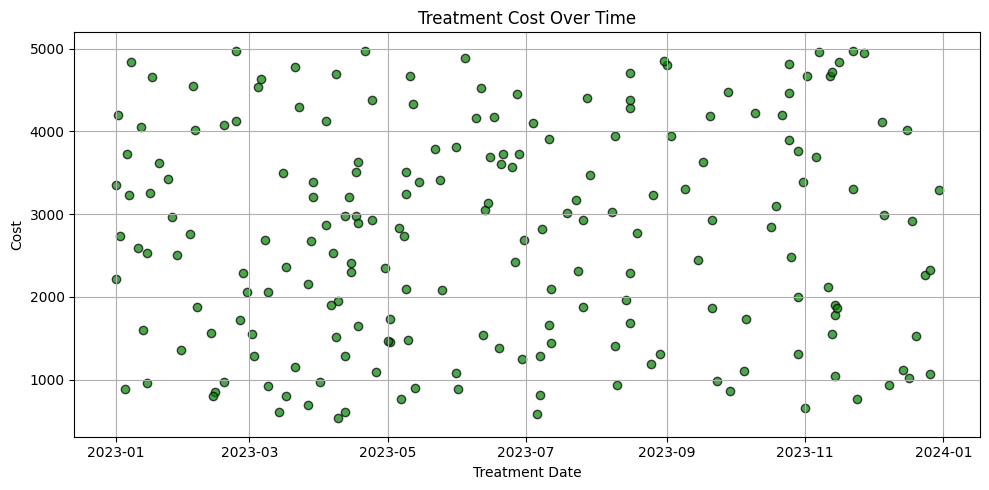

In [ ]:
# Convert treatment_date to datetime
Treatments['treatment_date'] = pd.to_datetime(Treatments['treatment_date'])

# Scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(Treatments['treatment_date'], Treatments['cost'],
            color='green', alpha=0.7, edgecolors='black')

# Titles and labels
plt.title('Treatment Cost Over Time')
plt.xlabel('Treatment Date')
plt.ylabel('Cost')
plt.grid(True)
plt.tight_layout()
plt.show()

Training and testing the model

After conducting an in-depth review of the available datasets and their respective columns, we identified that none of the existing fields were sufficient to directly capture or predict healthcare demand. To address this limitation, we engineered a new feature called “Number of Visits”, which aggregates the frequency of appointments or consultations that patients make with doctors, specialists, and general practitioners (GPs).

This derived column serves as a proxy measure for healthcare service demand within the context of the National Health Insurance (NHI) system. By quantifying patient visits, it allows us to more accurately model, analyze, and forecast patterns in healthcare utilization, thereby providing valuable insights into the demand placed on various healthcare providers.

In [ ]:
Patients = pd.read_csv('/content/drive/MyDrive/dataset3/patients.csv')
Patients['number_of_visits'] = ['4','3','2','2','8','0','4','2','4','6','2','10','4','3','0','7','4','2','5','2','3','4','6','4','5','6','2','3','7','3','4','5','4','3','7','7','6','2','5',3
,'3','2','3','2','5','3','3','5','7','4']
Patients.head()

,patient_id,first_name,last_name,gender,date_of_birth,contact_number,address,registration_date,insurance_provider,insurance_number,email,number_of_visits
0,P001,David,Williams,F,1955-06-04,6939585183,789 Pine Rd,2022-06-23,WellnessCorp,INS840674,david.williams@mail.com,4
1,P002,Emily,Smith,F,1984-10-12,8228188767,321 Maple Dr,2022-01-15,PulseSecure,INS354079,emily.smith@mail.com,3
2,P003,Laura,Jones,M,1977-08-21,8397029847,321 Maple Dr,2022-02-07,PulseSecure,INS650929,laura.jones@mail.com,2
3,P004,Michael,Johnson,F,1981-02-20,9019443432,123 Elm St,2021-03-02,HealthIndia,INS789944,michael.johnson@mail.com,2
4,P005,David,Wilson,M,1960-06-23,7734463155,123 Elm St,2021-09-29,MedCare Plus,INS788105,david.wilson@mail.com,8


importing and installing neccessary libraries to manipulate , train and test the data

install stremalit

In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 74.5 MB/s eta 0:00:00


In [ ]:
!pip install ngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 31.2 MB/s eta 0:00:00


installing joblib

In [ ]:
!pip install joblib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib as jb
from pathlib import Path


import streamlit as st
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

st.set_page_config(page_title="Patient Demand Prediction", layout="wide")

2025-08-27 15:34:28.170 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Load data

In [ ]:
@st.cache_data
def load_data():
    patients = pd.read_csv("/content/drive/MyDrive/dataset3/patients.csv")
    appointments = pd.read_csv("/content/drive/MyDrive/dataset3/appointments.csv")

2025-08-27 15:52:27.266 No runtime found, using MemoryCacheStorageManager


Compute number of visits

In [ ]:
visit_counts = appointments["patient_id"].value_counts().reset_index()
visit_counts.columns = ["patient_id", "number_of_visits"]

Merge into patients

In [ ]:
patients = patients.merge(visit_counts, on="patient_id", how="left")
patients["number_of_visits"] = patients["number_of_visits"].fillna(0).astype(int)

Create demand column

In [ ]:
patients["demand"] = (patients["number_of_visits"] > 1).astype(int)

patients["age"] = pd.to_datetime("today").year - pd.to_datetime(
patients["date_of_birth"], errors="coerce"
).dt.year



Train, Test and Evaluate Model

In [ ]:
def train_model(patients):
    X = patients[["age", "gender", "insurance_provider"]]
    y = patients["demand"]

    categorical_cols = [col for col in X.columns if X[col].dtype == "object"]
    numeric_cols = [col for col in X.columns if col not in categorical_cols]

    preprocessor = ColumnTransformer(
        transformers=[
            ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
            ("num", "passthrough", numeric_cols),
        ]
    )

    clf = Pipeline(
        steps=[
            ("prep", preprocessor),
            ("model", RandomForestClassifier(
                n_estimators=300, random_state=42, class_weight="balanced"
            )),
        ]
    )

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    return clf, acc, report
    y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9230769230769231

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.92      1.00      0.96        12

    accuracy                           0.92        13
   macro avg       0.46      0.50      0.48        13
weighted avg       0.85      0.92      0.89        13



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Streamlit UI

In [ ]:
st.title("🏥 Patient Demand Prediction")

2025-08-27 16:08:56.325 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 16:08:56.326 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 16:08:56.327 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
patients = load_data()
clf, acc, report = train_model(patients)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Sidebar

In [ ]:
page = st.sidebar.radio("Choose Dashboard", ["Automated Dashboard", "Manual Prediction"])

2025-08-27 16:09:32.823 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 16:09:32.824 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 16:09:32.825 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 16:09:32.826 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 16:09:32.827 Session state does not function when running a script without `streamlit run`
2025-08-27 16:09:32.829 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 16:09:32.829 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 16:09:32.830 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Automated Dashboard and Manual Prediction

In [ ]:
if page == "Automated Dashboard":
    st.subheader("📊 Automated Dashboard")
    st.write("This dashboard trains a RandomForest model automatically and evaluates it.")

    st.metric("Accuracy", f"{acc:.2%}")

    st.subheader("Classification Report")
    st.dataframe(pd.DataFrame(report).transpose())

    st.subheader("Sample of Patients Data")
    st.dataframe(patients.head(10))

else:
    st.subheader("✍️ Manual Prediction")
    st.write("Enter patient details to predict whether demand will be high (multiple visits).")

    with st.form("prediction_form"):
        age = st.number_input("Age", min_value=0, max_value=120, value=30)
        gender = st.selectbox("Gender", patients["gender"].unique())
        insurance = st.selectbox("Insurance Provider", patients["insurance_provider"].unique())
        submit = st.form_submit_button("Predict")

    if submit:
        input_df = pd.DataFrame([{
            "age": age,
            "gender": gender,
            "insurance_provider": insurance,
        }])

        prediction = clf.predict(input_df)[0]
        st.success(f"✅ Predicted Demand: {'High (multiple visits)' if prediction==1 else 'Low (single visit)'}")


requirements = """streamlit>=1.37.0
pandas>=2.0.0
numpy>=1.24.0
scikit-learn>=1.3.0
matplotlib>=3.7.0
joblib>=1.3.0
"""

readme = (
    "# Healthcare ML Streamlit App\n\n"
    "This app lets you upload a CSV dataset, explore it, train different ML classifiers with automatic preprocessing, view metrics and confusion matrix, and download the trained pipeline.\n\n"
    "## 🚀 Quick Start\n"
    "```\n"
)

2025-08-27 16:13:42.486 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 16:13:42.487 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 16:13:42.488 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 16:13:42.489 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 16:13:42.490 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 16:13:42.491 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 16:13:42.492 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 16:13:42.493 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Creating app.py, requirements.txt and readMe.md

In [ ]:

Path("requirements.txt").write_text(requirements)
Path("README.md").write_text(readme)

print("Files created: streamlit_app.py, requirements.txt, README.md")

Files created: streamlit_app.py, requirements.txt, README.md


Installing requirements.txt and pyngrok to run model

In [ ]:
!pip install -r requirements.txt
!pip install pyngrok

Using ngrok to recieve public link to open the model on Browser

In [ ]:
from pyngrok import ngrok
import threading
import os

def run_app():
    os.system("streamlit run streamlit_app.py --server.port 8501")

thread = threading.Thread(target=run_app)
thread.start()

ngrok.set_auth_token("31oxtijFTwJjfh5lstdBM7aSDJa_6KcnATpWQD6sm39a35v53")

public_url = ngrok.connect(8501)
print("👉 Streamlit app running at:", public_url)

👉 Streamlit app running at: NgrokTunnel: "https://3240d26148fb.ngrok-free.app" -> "http://localhost:8501"


Click second link to open the model